# Conexiones en Linkedin

Replicando el analisis de : <a href=https://towardsdatascience.com/visualizing-my-linkedin-network-c4b232ab2ad0>Visualizing My LinkedIn Network</a>

## Librerías

In [7]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from nxviz import MatrixPlot, ArcPlot, CircosPlot

## Los datos

Linkedin permite descargar los datos personales desde: Ajustes y privacidad > Cómo utiliza Linkedin tus datos > Obtener una copia de tus datos

In [8]:
df = pd.read_csv('conexiones.csv')
df = df.dropna(subset=['Company', 'Position'])
df = df[['Company','Position']]

In [9]:
df.head()

Company                       Position
0       Badi                 Data Scientist
1     Oracle                   consultor cx
2       Ualá                    Analista BI
3  Accenture  Business Intelligence Analyst
4    Wenance                 Data Scientist

## Visualización

In [10]:
# Nodo raíz del TreeMap
df['My Network'] = 'My Network'
# Agrupar nombres 
df.loc[df['Position'] == 'Data Science Analyst', 'Position'] = 'Data Scientist'
df.loc[df['Position'] == 'Lead Data Scientist', 'Position'] = 'Data Scientist'
df.loc[df['Position'] == 'Gerente general', 'Position'] = 'Gerente'
df.loc[df['Position'] == 'Socio Gerente', 'Position'] = 'Gerente'
df.loc[df['Position'] == 'Asistente de investigación', 'Position'] = 'Investigador'
df.loc[df['Position'] == 'Investigador asistente', 'Position'] = 'Investigador'
df.loc[df['Position'] == 'Consultor independiente', 'Position'] = 'Consultor'
df.loc[df['Position'] == 'CX Consultant', 'Position'] = 'Consultor'
df.loc[df['Position'] == 'Consultant', 'Position'] = 'Consultor'
df.loc[df['Position'] == 'Consultora', 'Position'] = 'Consultor'
df.loc[df['Position'] == 'Consultor', 'Position'] = 'Consultor/a'
df.loc[df['Position'] == 'Economist', 'Position'] = 'Economista'
df.loc[df['Position'] == 'Representante del servicio de atención al cliente', 'Position'] = 'Atención al cliente'
df.loc[df['Position'] == 'Servicio de atención al cliente', 'Position'] = 'Atención al cliente'
df.loc[df['Position'] == 'Senior Economist', 'Position'] = 'Economista'
df.loc[df['Position'] == 'Becario de investigación', 'Position'] = 'Investigador'
df.loc[df['Position'] == 'President', 'Position'] = 'Presidente'

df.loc[df['Company'] == 'UNLP-Universidad Nacional de La Plata', 'Company'] = 'Universidad Nacional de La Plata'
df.loc[df['Company'] == 'Oracle NetSuite', 'Company'] = 'NetSuite'




### En función del puesto

#### Puestos que se repiten más de una vez

In [11]:
df2=df[['Position']]
df2=df2.groupby('Position').size().reset_index(name='counts').sort_values('counts', ascending=False)
df2=df2[df2['counts']>1]
df3=df[df['Position'].isin(df2['Position'])]


In [12]:
fig = px.treemap(df3, path=['My Network', 'Position', 'Company'], 
                 width=1000, 
                 height=1000)
fig.show()

### En función de la empresa

In [13]:
df2=df[['Company']]
df2=df2.groupby('Company').size().reset_index(name='counts').sort_values('counts', ascending=False)
df2=df2[df2['counts']>1]
df3=df[df['Company'].isin(df2['Company'])]


In [14]:
fig = px.treemap(df3, path=['My Network', 'Company', 'Position'], width=1000, height=1000)
fig.show()

# Networks

In [15]:
df2=df[['Company']]
df2=df2.groupby('Company').size().reset_index(name='counts').sort_values('counts', ascending=False)
df2=df2[df2['counts']>=2]
df3=df[df['Company'].isin(df2['Company'])]

df3.loc[df3['Company'].str.contains('Netsuite', case=False), 'Company'] = 'Oracle'
df3.loc[df3['Company'].str.contains('Universidad', case=False), 'Company'] = 'Universidad'
df3.loc[df3['Company'].str.contains('facultad', case=False), 'Company'] = 'Universidad'
df3.loc[df3['Company'].str.contains('ministerio', case=False), 'Company'] = 'Ministerio'
df3.loc[df3['Company'].str.contains('secretaría', case=False), 'Company'] = 'Secretaría'

df3.loc[df3['Position'].str.contains('consultant', case=False), 'Position'] = 'Consultor/a'
df3.loc[df3['Position'].str.contains('consultor', case=False), 'Position'] = 'Consultor/a'
df3.loc[df3['Position'].str.contains('consultora', case=False), 'Position'] = 'Consultor/a'
df3.loc[df3['Position'].str.contains('economist', case=False), 'Position'] = 'Economista'
df3.loc[df3['Position'].str.contains('economista', case=False), 'Position'] = 'Economista'
df3.loc[df3['Position'].str.contains('economic', case=False), 'Position'] = 'Economista'
df3.loc[df3['Position'].str.contains('soporte', case=False), 'Position'] = 'Soporte'
df3.loc[df3['Position'].str.contains('investigador', case=False), 'Position'] = 'Investigador'
df3.loc[df3['Position'].str.contains('Profesor', case=False), 'Position'] = 'Profesor'
df3.loc[df3['Position'].str.contains('docente', case=False), 'Position'] = 'Profesor'
df3.loc[df3['Position'].str.contains('analista funcional', case=False), 'Position'] = 'Analista Funcional'
df3.loc[df3['Position'].str.contains('data science', case=False), 'Position'] = 'Data Scientist'
df3.loc[df3['Position'].str.contains('data scientist', case=False), 'Position'] = 'Data Scientist'
df3.loc[df3['Position'].str.contains('data analyst', case=False), 'Position'] = 'Analista de datos'
df3.loc[df3['Position'].str.contains('analista', case=False), 'Position'] = 'Analista'
df3.loc[df3['Position'].str.contains('netsuite', case=False), 'Position'] = 'ERP'
df3.loc[df3['Position'].str.contains('economía y regulación de los servicios', case=False), 'Position'] = 'Profesor'
df3.loc[df3['Position'].str.contains('director', case=False), 'Position'] = 'Director'
df3.loc[df3['Position'].str.contains('macroeconomics I', case=False), 'Position'] = 'Profesor'
df3.loc[df3['Position'].str.contains('Consulting', case=False), 'Position'] = 'Consultor/a'
df3.loc[df3['Position'].str.contains('Coordinación de seguimiento', case=False), 'Position'] = 'Coordinación de seguimiento de proyectos urbanos'
df3.loc[df3['Position'].str.contains('Coordinadora en precios mayoristas', case=False), 'Position'] = 'Coordinadora en precios mayoristas'
df3.loc[df3['Position'].str.contains('profesional contable', case=False), 'Position'] = 'Contador'

/Users/karinabartolome/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/karinabartolome/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/karinabartolome/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/karinabartolome/opt/ana

In [16]:
G = nx.Graph()
G.add_nodes_from(df3['Company'], bipartite='Company')
G.add_nodes_from(df3['Position'], bipartite='Position')
G.nodes()



NodeView(('Oracle', 'Ualá', 'Accenture', 'Hospital Italiano de Buenos Aires', 'Mercado Libre', 'Universidad', 'PwC Argentina', 'Banco de la Provincia de Buenos Aires', 'Banco Galicia', 'Gobierno de la Provincia de Buenos Aires', 'invertirOnline.com', 'Baufest', 'Tecnosoftware', 'INDEC Argentina', 'The World Bank', 'KPMG Argentina', 'Ministerio', 'Gobierno de la Ciudad de Buenos Aires', 'YPF SA', 'ARBA', 'IT Convergence', 'Telefónica', 'Banco Macro', 'Grupo Randazzo', 'Accenture Argentina', 'EY', 'Invecq Consulting SA', 'Santander Argentina', 'Autónomo', 'Banco de la Nación Argentina', 'ANSES', 'Banco Central de la República Argentina', 'FIEL', 'Comisión Económica para América Latina y el Caribe (CEPAL)', 'AFIP', 'BBVA en Argentina', 'Consultor/a', 'Analista', 'Business Intelligence Analyst', 'Talent Acquisition Specialist', 'Data Integration Lead', 'Machine Learning Engineer (Information Retrieval & Natural Language Processing)', 'Supervisor de Prevención de Fraude', 'Jefe de administr

In [17]:
G.add_edges_from(zip(df3['Company'], df3['Position'])) 
G.edges() 

EdgeView([('Oracle', 'Consultor/a'), ('Oracle', 'ERP'), ('Oracle', 'Analista'), ('Oracle', 'Autonomous Database Sales Representative - Enterprise Accounts '), ('Oracle', 'Facilities Manager'), ('Oracle', 'Director'), ('Oracle', 'Programador sénior'), ('Oracle', 'Business Transformation Sales Account Manager'), ('Oracle', 'Product Manager'), ('Oracle', 'Senior Vice President Applications'), ('Ualá', 'Analista'), ('Ualá', 'Talent Acquisition Specialist'), ('Ualá', 'Data Integration Lead'), ('Ualá', 'Jefe de administración'), ('Ualá', 'Data Scientist'), ('Ualá', 'Financial Systems Manager'), ('Ualá', 'Data Research Analyst'), ('Ualá', 'Business Analytics Manager'), ('Accenture', 'Business Intelligence Analyst'), ('Accenture', 'Analista'), ('Accenture', 'Data Specialist'), ('Accenture', 'Data Scientist'), ('Accenture', 'Client Financial Management Specialist'), ('Accenture', 'Economista'), ('Accenture', 'Global Corporate Function Finance Associate'), ('Accenture', 'Client Financial Managem

In [18]:
company_nodes = [n for n in G.nodes() if G.node[n] ['bipartite'] == 'Company']
company_nodes

['Oracle',
 'Ualá',
 'Accenture',
 'Hospital Italiano de Buenos Aires',
 'Mercado Libre',
 'Universidad',
 'PwC Argentina',
 'Banco de la Provincia de Buenos Aires',
 'Banco Galicia',
 'Gobierno de la Provincia de Buenos Aires',
 'invertirOnline.com',
 'Baufest',
 'Tecnosoftware',
 'INDEC Argentina',
 'The World Bank',
 'KPMG Argentina',
 'Ministerio',
 'Gobierno de la Ciudad de Buenos Aires',
 'YPF SA',
 'ARBA',
 'IT Convergence',
 'Telefónica',
 'Banco Macro',
 'Grupo Randazzo',
 'Accenture Argentina',
 'EY',
 'Invecq Consulting SA',
 'Santander Argentina',
 'Autónomo',
 'Banco de la Nación Argentina',
 'ANSES',
 'Banco Central de la República Argentina',
 'FIEL',
 'Comisión Económica para América Latina y el Caribe (CEPAL)',
 'AFIP',
 'BBVA en Argentina']

In [19]:
position_nodes = [n for n in G.nodes() if G.node[n] ['bipartite'] == 'Position']

In [20]:
companyG = nx.bipartite.projected_graph(G, nodes=company_nodes)
positionG = nx.bipartite.projected_graph(G, nodes=position_nodes)
companyG.nodes()
positionG.nodes()

NodeView(('Consultor/a', 'Analista', 'Business Intelligence Analyst', 'Talent Acquisition Specialist', 'Data Integration Lead', 'Machine Learning Engineer (Information Retrieval & Natural Language Processing)', 'Supervisor de Prevención de Fraude', 'Jefe de administración', 'Trabajo de campo', 'Economista', 'Data Scientist', 'Financial Systems Manager', 'Data Research Analyst', 'Posgrados Económicas', 'Business Analytics Manager', 'ERP', 'Ayudante Alumno ad-honorem', 'Subsecretaría de Coordinacion de la Gestion ', 'Atención al cliente', 'Admisiones y Desarrollo Institucional', 'Data Practice Head - Americas', 'Data Specialist', 'Profesor', 'Ejecutivo Comercial', 'Coordinación de seguimiento de proyectos urbanos', 'Autonomous Database Sales Representative - Enterprise Accounts ', 'Facilities Manager', 'Director', 'operador de campo', 'Asesor', 'Tecnico impositivo', 'Gestión en control de producción', 'Programador sénior', 'Business Transformation Sales Account Manager', 'Formadora en Ac

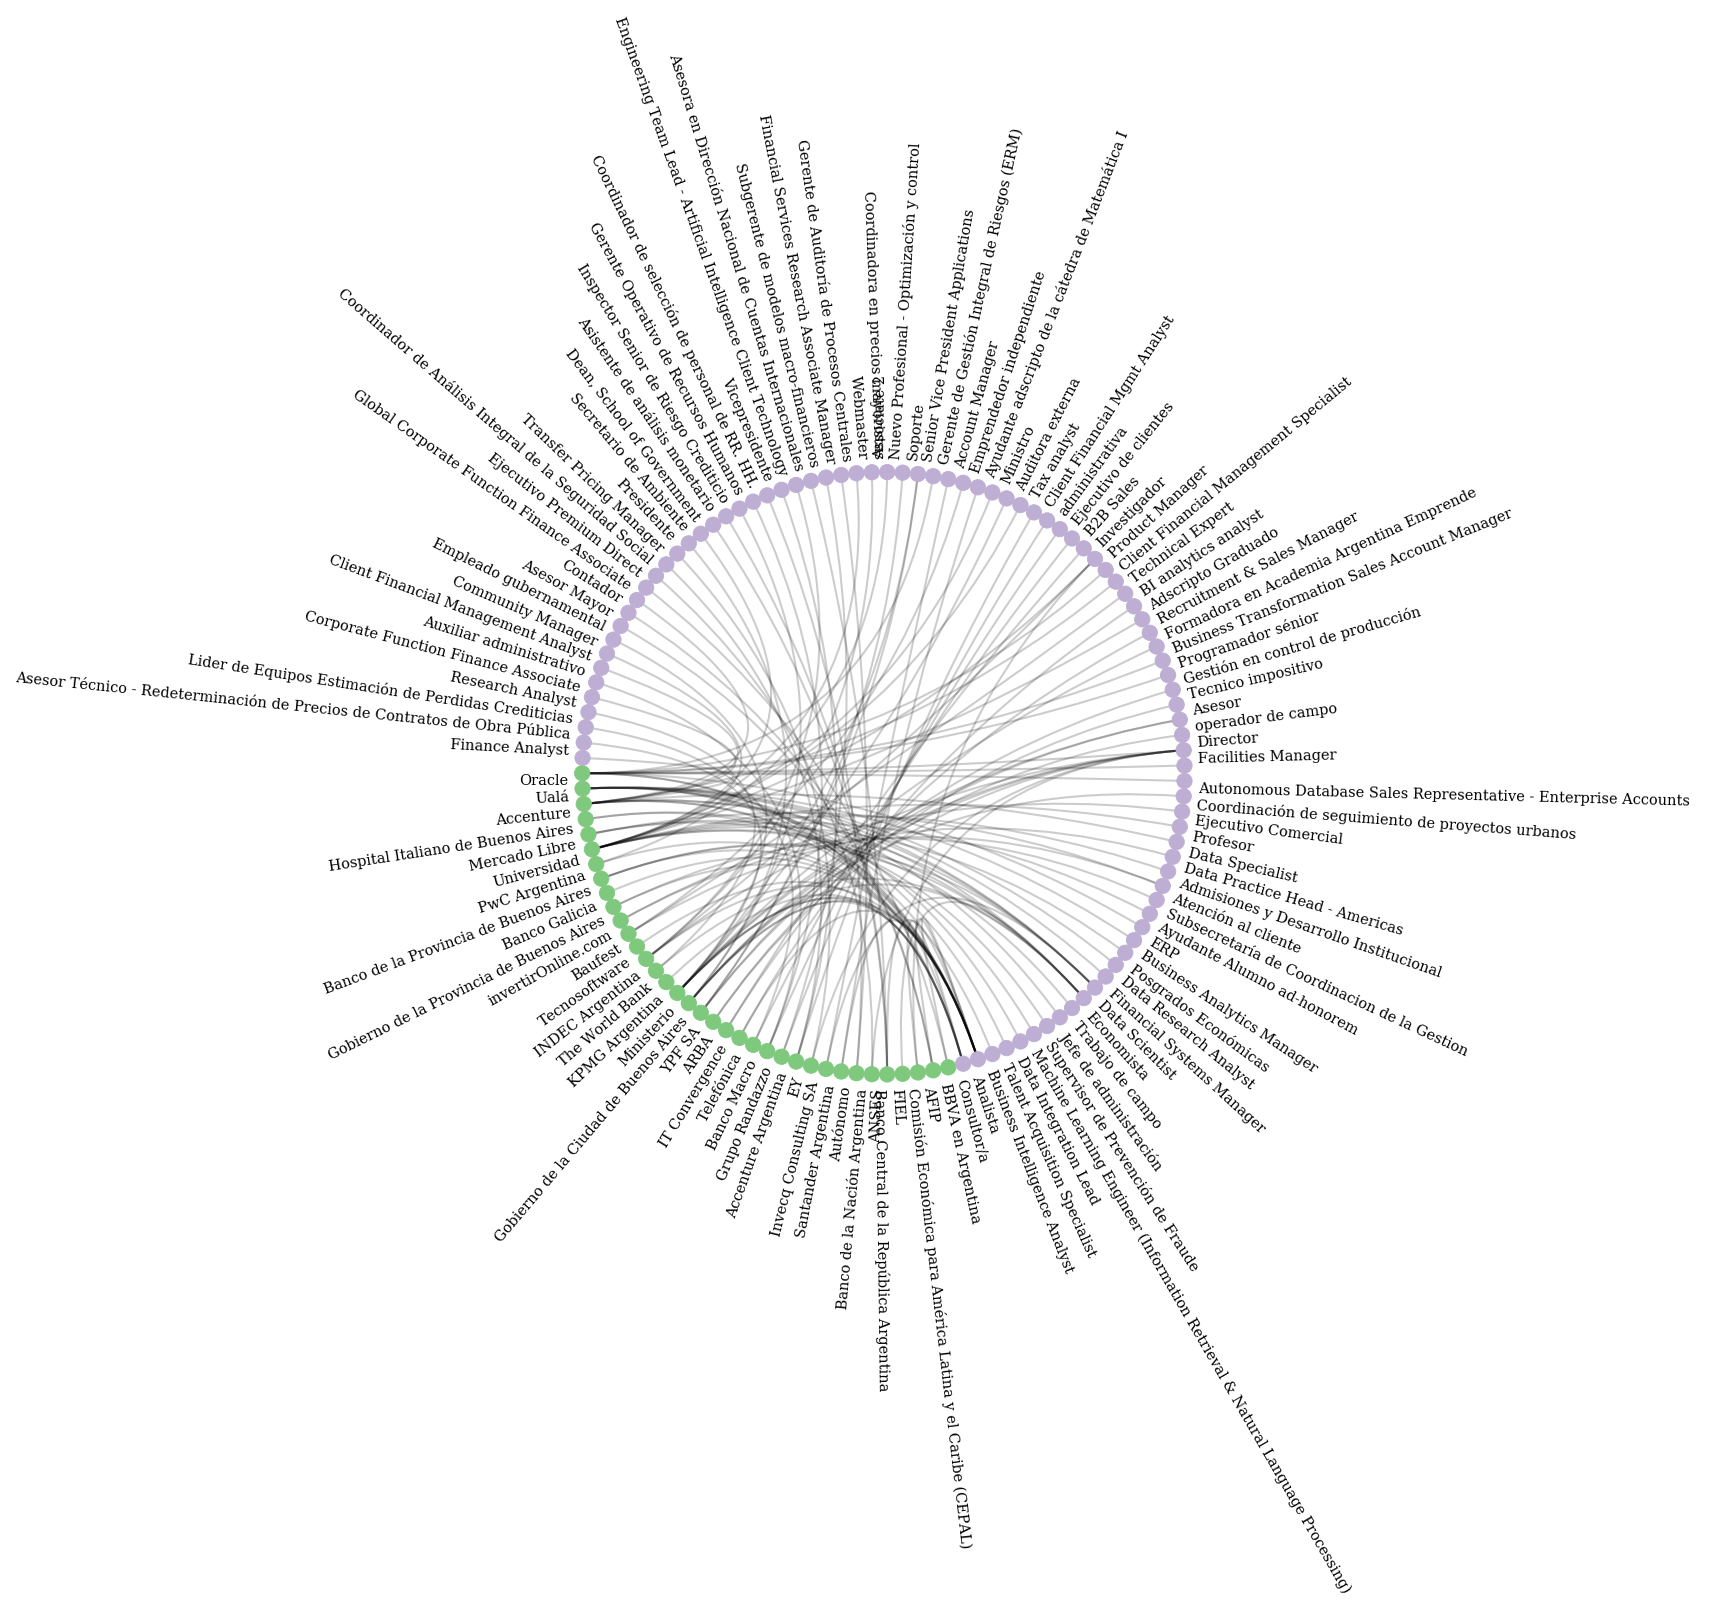

In [21]:
plt.rcParams['figure.dpi'] = 150

from nxviz import CircosPlot
c = CircosPlot(G, node_grouping='bipartite',
               node_color='bipartite', 
               node_labels=company_nodes, 
               fontsize=7,
               node_label_layout="rotation") 

c.draw() 
plt.savefig('line plot.jpg', bbox_inches='tight', dpi=150)


